# Convolution Nets for MNIST

### TelescopeUser: 10-class classification problem

<img src="imgs/mnist_plot.png"
     style="float: left; margin-right: 1px;" width="500" height="400" />

Deep Learning models can take quite a bit of time to run, particularly if GPU isn't used. 

In the interest of time, you could sample a subset of observations (e.g. $1000$) that are a particular number of your choice (e.g. $6$) and $1000$ observations that aren't that particular number (i.e. $\neq 6$). 

We will build a model using that and see how it performs on the test dataset

In [1]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [3]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [4]:
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading Data

In [5]:
# Load the training and testing data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# Display purpose:
X_train_orig = X_train
X_test_orig = X_test

## Data Preparation

### Very Important: 
When dealing with images & convolutions, it is paramount to handle `image_data_format` properly

In [6]:
from keras import backend as K

In [7]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

#### Preprocess and Normalise Data

In [8]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

### Let's look at some images

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

[5 0 4 1 9 2 1 3 1 4]


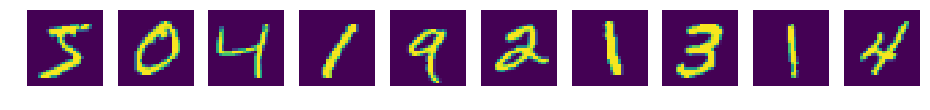

In [10]:
print(Y_train[0:10])

slice = 10
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_train_orig[i], interpolation='nearest')
    plt.axis('off')

[7 2 1 0 4 1 4 9 5 9]


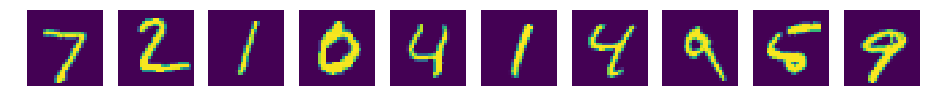

In [11]:
print(Y_test[0:10])

slice = 10
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.axis('off')

### One-hot Encoding for label digits 0 ~ 9

In [12]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [13]:
# Converting the classes to its binary categorical form
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [14]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [15]:
Y_train[0:10]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [16]:
Y_test[0:10]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

# A simple CNN

In [17]:
# -- Initializing the values for the convolution neural network

# nb_epoch = 2  # kept very low! Please increase if you have GPU instead of CPU
nb_epoch = 20  # kept very low! Please increase if you have GPU instead of CPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# Vanilla SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

#### Step 1: Model Definition

In [18]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                216330    
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


#### Step 2: Compile

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

#### Step 3: Fit

In [20]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s - loss: 0.1662 - acc: 0.9507 - val_loss: 0.0783 - val_acc: 0.9752
Epoch 2/20
60000/60000 [==============================] - 20s - loss: 0.0677 - acc: 0.9797 - val_loss: 0.0816 - val_acc: 0.9755
Epoch 3/20
60000/60000 [==============================] - 20s - loss: 0.0482 - acc: 0.9849 - val_loss: 0.0662 - val_acc: 0.9786
Epoch 4/20
60000/60000 [==============================] - 20s - loss: 0.0357 - acc: 0.9887 - val_loss: 0.0756 - val_acc: 0.9786
Epoch 5/20
60000/60000 [==============================] - 20s - loss: 0.0251 - acc: 0.9919 - val_loss: 0.0811 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 20s - loss: 0.0164 - acc: 0.9949 - val_loss: 0.0701 - val_acc: 0.9815
Epoch 7/20
60000/60000 [==============================] - 20s - loss: 0.0133 - acc: 0.9956 - val_loss: 0.0838 - val_acc: 0.9793
Epoch 8/20
60000/60000 [==============================

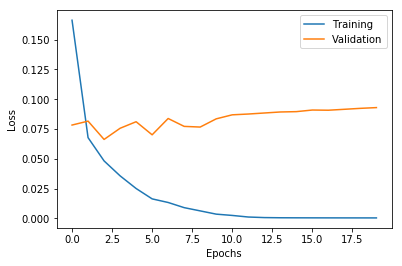

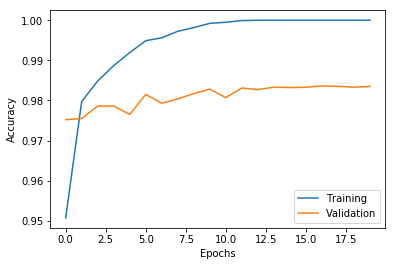

In [21]:
# import matplotlib.pyplot as plt
# %matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

### Step 4: Evaluate

In [22]:
print('Available Metrics in Model: {}'.format(model.metrics_names))

Available Metrics in Model: ['loss', 'acc']


In [23]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.0929218709099
Test Accuracy: 0.9835


### Let's plot our model Predictions!

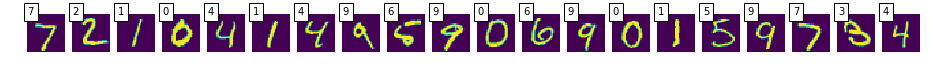

In [24]:
slice = 20
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Dense Layers

In [25]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2769024   
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total para

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s - loss: 0.4825 - acc: 0.8743 - val_loss: 0.2789 - val_acc: 0.9173
Epoch 2/20
60000/60000 [==============================] - 22s - loss: 0.2376 - acc: 0.9315 - val_loss: 0.2125 - val_acc: 0.9387
Epoch 3/20
60000/60000 [==============================] - 22s - loss: 0.1855 - acc: 0.9467 - val_loss: 0.1669 - val_acc: 0.9510
Epoch 4/20
60000/60000 [==============================] - 22s - loss: 0.1528 - acc: 0.9554 - val_loss: 0.1325 - val_acc: 0.9611
Epoch 5/20
60000/60000 [==============================] - 22s - loss: 0.1301 - acc: 0.9624 - val_loss: 0.1321 - val_acc: 0.9590
Epoch 6/20
60000/60000 [==============================] - 22s - loss: 0.1137 - acc: 0.9671 - val_loss: 0.1093 - val_acc: 0.9680
Epoch 7/20
60000/60000 [==============================] - 22s - loss: 0.1012 - acc: 0.9708 - val_loss: 0.0986 - val_acc: 0.9698
Epoch 8/20
60000/60000 [==============================

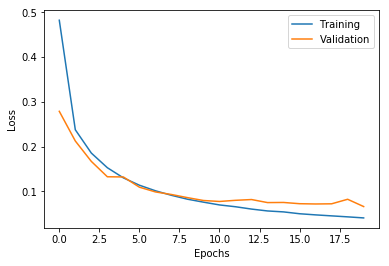

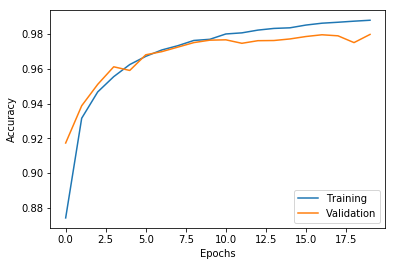

In [27]:
# import matplotlib.pyplot as plt
# %matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [28]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.0659397623455
Test accuracy: 0.9797


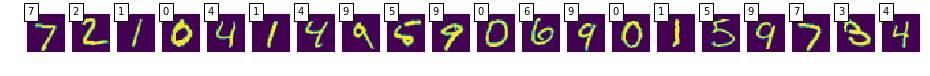

In [29]:
slice = 20
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding Dropout

In [30]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                        padding='valid',
                        input_shape=shape_ord))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2769024   
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
__________

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s - loss: 0.6322 - acc: 0.8171 - val_loss: 0.2592 - val_acc: 0.9258
Epoch 2/20
60000/60000 [==============================] - 23s - loss: 0.3303 - acc: 0.9036 - val_loss: 0.1945 - val_acc: 0.9429
Epoch 3/20
60000/60000 [==============================] - 23s - loss: 0.2710 - acc: 0.9214 - val_loss: 0.1619 - val_acc: 0.9532
Epoch 4/20
60000/60000 [==============================] - 23s - loss: 0.2409 - acc: 0.9310 - val_loss: 0.1425 - val_acc: 0.9578
Epoch 5/20
60000/60000 [==============================] - 23s - loss: 0.2231 - acc: 0.9350 - val_loss: 0.1306 - val_acc: 0.9617
Epoch 6/20
60000/60000 [==============================] - 23s - loss: 0.2050 - acc: 0.9399 - val_loss: 0.1211 - val_acc: 0.9644
Epoch 7/20
60000/60000 [==============================] - 23s - loss: 0.1983 - acc: 0.9416 - val_loss: 0.1139 - val_acc: 0.9669
Epoch 8/20
60000/60000 [==============================

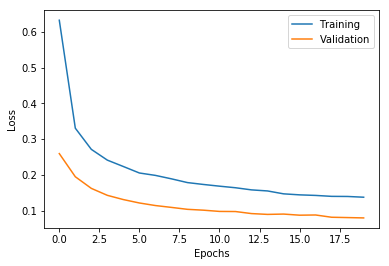

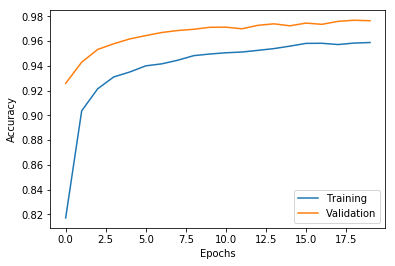

In [32]:
# import matplotlib.pyplot as plt
# %matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [33]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.0792893245731
Test accuracy: 0.9764


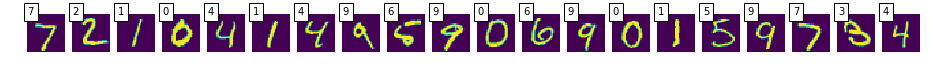

In [34]:
slice = 20
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Convolution Layers

In [35]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
__________

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s - loss: 0.9232 - acc: 0.7016 - val_loss: 0.2835 - val_acc: 0.9184
Epoch 2/20
60000/60000 [==============================] - 29s - loss: 0.3928 - acc: 0.8798 - val_loss: 0.1982 - val_acc: 0.9427
Epoch 3/20
60000/60000 [==============================] - 29s - loss: 0.3140 - acc: 0.9049 - val_loss: 0.1621 - val_acc: 0.9528
Epoch 4/20
60000/60000 [==============================] - 29s - loss: 0.2622 - acc: 0.9213 - val_loss: 0.1308 - val_acc: 0.9604
Epoch 5/20
60000/60000 [==============================] - 29s - loss: 0.2216 - acc: 0.9326 - val_loss: 0.1105 - val_acc: 0.9665
Epoch 6/20
60000/60000 [==============================] - 29s - loss: 0.1954 - acc: 0.9415 - val_loss: 0.0959 - val_acc: 0.9706
Epoch 7/20
60000/60000 [==============================] - 29s - loss: 0.1741 - acc: 0.9473 - val_loss: 0.0849 - val_acc: 0.9741
Epoch 8/20
60000/60000 [==============================

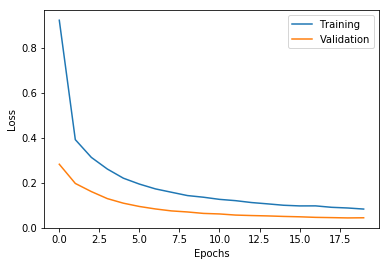

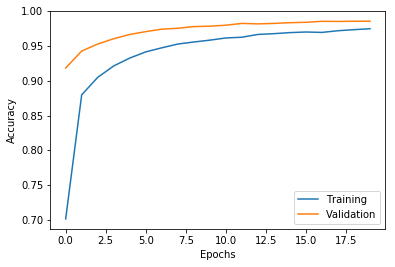

In [37]:
# import matplotlib.pyplot as plt
# %matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [38]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.0457361380112
Test accuracy: 0.9855


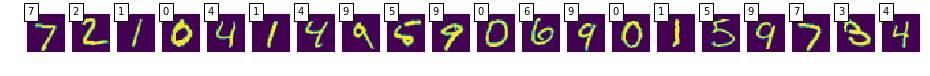

In [39]:
slice = 20
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Exercise

The above code has been written as a function. 

Change some of the **hyperparameters** and see what happens. 

In [40]:
nb_epoch = 100

In [41]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.summary()
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
    hist = model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    return hist, model

In [42]:
# Train and test model in one shot
hist, model = build_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
__________

60000/60000 [==============================] - 29s - loss: 0.0440 - acc: 0.9861 - val_loss: 0.0298 - val_acc: 0.9901
Epoch 49/100
60000/60000 [==============================] - 29s - loss: 0.0423 - acc: 0.9866 - val_loss: 0.0293 - val_acc: 0.9897
Epoch 50/100
60000/60000 [==============================] - 29s - loss: 0.0412 - acc: 0.9866 - val_loss: 0.0285 - val_acc: 0.9903
Epoch 51/100
60000/60000 [==============================] - 29s - loss: 0.0408 - acc: 0.9870 - val_loss: 0.0285 - val_acc: 0.9907
Epoch 52/100
60000/60000 [==============================] - 29s - loss: 0.0419 - acc: 0.9859 - val_loss: 0.0286 - val_acc: 0.9897
Epoch 53/100
60000/60000 [==============================] - 29s - loss: 0.0402 - acc: 0.9875 - val_loss: 0.0284 - val_acc: 0.9903
Epoch 54/100
60000/60000 [==============================] - 29s - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0292 - val_acc: 0.9904
Epoch 55/100
60000/60000 [==============================] - 29s - loss: 0.0386 - acc: 0.9880 - val_loss

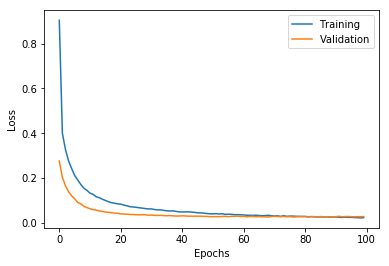

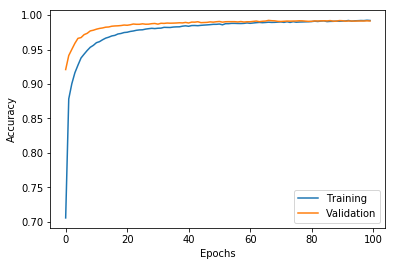

In [43]:
# import matplotlib.pyplot as plt
# %matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [44]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.0288531594841
Test accuracy: 0.9914


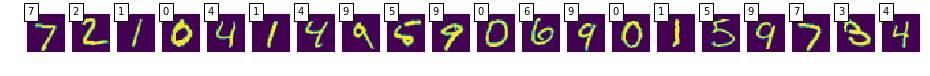

In [45]:
slice = 20
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

---

## Understanding Convolutional Layers Structure

In this exercise we want to build a (_quite shallow_) network which contains two 
[Convolution, Convolution, MaxPooling] stages, and two Dense layers.

To test a different optimizer, we will use [AdaDelta](http://keras.io/optimizers/), which is a bit more complex than the simple Vanilla SGD with momentum.

In [46]:
from keras.optimizers import Adadelta

In [47]:
input_shape = shape_ord
nb_classes = 10

### Understanding layer shapes

An important feature of Keras layers is that each of them has an `input_shape` attribute, which you can use to visualize the shape of the input tensor, and an `output_shape` attribute, for inspecting the shape of the output tensor.

As we can see, the input shape of the first convolutional layer corresponds to the `input_shape` attribute (which must be specified by the user). 

In this case, it is a `28x28` image with three color channels. 

Since this convolutional layer has the `padding` set to `same`, its output width and height will remain the same, and the number of output channel will be equal to the number of filters learned by the layer, 16. 

The following convolutional layer, instead, have the default `padding`, and therefore reduce width and height by $(k-1)$, where $k$ is the size of the kernel. 

`MaxPooling` layers, instead, reduce width and height of the input tensor, but keep the same number of channels. 

`Activation` layers, of course, don't change the shape.

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
__________

In [50]:
for i, layer in enumerate(model.layers):
    print ("Layer", i, "\t", layer.name, "\t\t", layer.input_shape, "\t", layer.output_shape)

Layer 0 	 conv2d_6 		 (None, 28, 28, 1) 	 (None, 26, 26, 32)
Layer 1 	 activation_13 		 (None, 26, 26, 32) 	 (None, 26, 26, 32)
Layer 2 	 conv2d_7 		 (None, 26, 26, 32) 	 (None, 24, 24, 32)
Layer 3 	 activation_14 		 (None, 24, 24, 32) 	 (None, 24, 24, 32)
Layer 4 	 max_pooling2d_2 		 (None, 24, 24, 32) 	 (None, 12, 12, 32)
Layer 5 	 dropout_4 		 (None, 12, 12, 32) 	 (None, 12, 12, 32)
Layer 6 	 flatten_5 		 (None, 12, 12, 32) 	 (None, 4608)
Layer 7 	 dense_8 		 (None, 4608) 	 (None, 128)
Layer 8 	 activation_15 		 (None, 128) 	 (None, 128)
Layer 9 	 dropout_5 		 (None, 128) 	 (None, 128)
Layer 10 	 dense_9 		 (None, 128) 	 (None, 10)
Layer 11 	 activation_16 		 (None, 10) 	 (None, 10)


### Understanding weights shape

In the same way, we can visualize the shape of the weights learned by each layer. 

In particular, Keras lets you inspect weights by using the `get_weights` method of a layer object. 

This will return a list with two elements, the first one being the **weight tensor** and the second one being the **bias vector**.

In particular:

- **MaxPooling layer** don't have any weight tensor, since they don't have learnable parameters. 


- **Convolutional layers**, instead, learn a $(n_o, n_i, k, k)$ weight tensor, where $k$ is the size of the kernel, $n_i$ is the number of channels of the input tensor, and $n_o$ is the number of filters to be learned. 

For each of the $n_o$ filters, a bias is also learned. 


- **Dense layers** learn a $(n_i, n_o)$ weight tensor, where $n_o$ is the output size and $n_i$ is the input size of the layer. Each of the $n_o$ neurons also has a bias.

In [51]:
for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:
        W, b = layer.get_weights()
        print("Layer", i, "\t", layer.name, "\t\t", W.shape, "\t", b.shape)

Layer 0 	 conv2d_6 		 (3, 3, 1, 32) 	 (32,)
Layer 2 	 conv2d_7 		 (3, 3, 32, 32) 	 (32,)
Layer 7 	 dense_8 		 (4608, 128) 	 (128,)
Layer 10 	 dense_9 		 (128, 10) 	 (10,)


# Batch Normalisation

Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

## How to BatchNorm in Keras

```python
from keras.layers.normalization import BatchNormalization

BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, 
                   beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
                   moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None,
                   beta_constraint=None, gamma_constraint=None)
```

#### Arguments

<ul>
<li><strong>axis</strong>: Integer, the axis that should be normalized
    (typically the features axis).
    For instance, after a <code>Conv2D</code> layer with
    <code>data_format="channels_first"</code>,
    set <code>axis=1</code> in <code>BatchNormalization</code>.</li>
<li><strong>momentum</strong>: Momentum for the moving average.</li>
<li><strong>epsilon</strong>: Small float added to variance to avoid dividing by zero.</li>
<li><strong>center</strong>: If True, add offset of <code>beta</code> to normalized tensor.
    If False, <code>beta</code> is ignored.</li>
<li><strong>scale</strong>: If True, multiply by <code>gamma</code>.
    If False, <code>gamma</code> is not used.
    When the next layer is linear (also e.g. <code>nn.relu</code>),
    this can be disabled since the scaling
    will be done by the next layer.</li>
<li><strong>beta_initializer</strong>: Initializer for the beta weight.</li>
<li><strong>gamma_initializer</strong>: Initializer for the gamma weight.</li>
<li><strong>moving_mean_initializer</strong>: Initializer for the moving mean.</li>
<li><strong>moving_variance_initializer</strong>: Initializer for the moving variance.</li>
<li><strong>beta_regularizer</strong>: Optional regularizer for the beta weight.</li>
<li><strong>gamma_regularizer</strong>: Optional regularizer for the gamma weight.</li>
<li><strong>beta_constraint</strong>: Optional constraint for the beta weight.</li>
<li><strong>gamma_constraint</strong>: Optional constraint for the gamma weight.</li>
</ul>

### Excercise

In [52]:
# Try to add a new BatchNormalization layer to the Model 
# (after the Dropout layer) - before or after the ReLU Activation

---